In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import tomli

from unicycle import SimulationConfig, Unicycle, simulate_system

base_path = Path(os.getcwd()).parent

In [2]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "times",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/bel fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}

plt.rcParams.update(tex_fonts)

Load general config settings

In [3]:
config = 'configs/config.toml'
abs_config_path = (base_path / config).resolve()
with open(abs_config_path, 'rb') as f:
    data = tomli.load(f)
    config = SimulationConfig(**data['simulation'])

Evaluate trained models

100%|██████████| 10000/10000 [00:27<00:00, 357.68it/s]


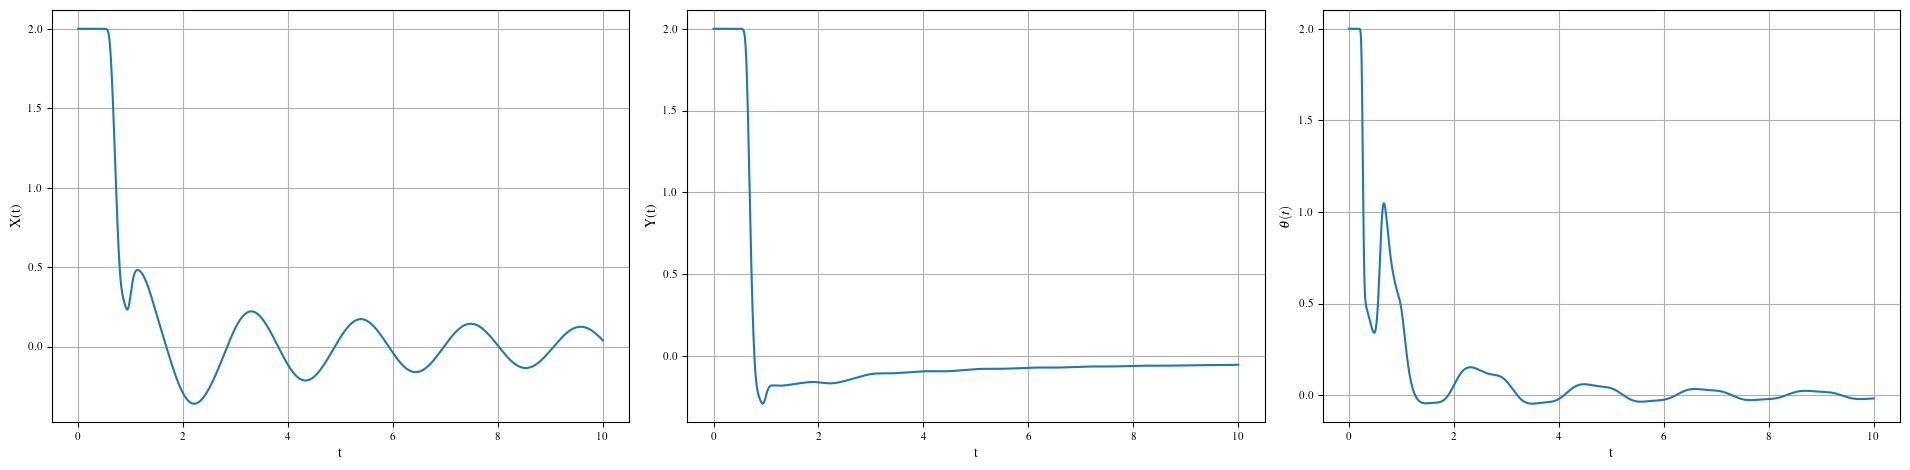

In [ ]:
# Exact predictor feedback simualtion
init_state = np.ones(3, dtype=np.float32)
unicycle = Unicycle(init_state, config)
states, controls, predictors, _ = simulate_system(unicycle)

# Visualize
plot_size = [6.4, 4.8]
fig, axs = plt.subplots(1, 3, figsize=(3 * plot_size[0], 1 * plot_size[1]), squeeze=False)

axs[0, 0].plot(config.t, states[:, 0])
axs[0, 0].set_xlabel("t")
axs[0, 0].set_ylabel("X(t)")
axs[0, 0].grid(True)

axs[0, 1].plot(config.t, states[:, 1])
axs[0, 1].set_xlabel("t")
axs[0, 1].set_ylabel("Y(t)")
axs[0, 1].grid(True)

axs[0, 2].plot(config.t, states[:, 2])
axs[0, 2].set_xlabel("t")
axs[0, 2].set_ylabel(r"$\theta(t)$")
axs[0, 2].grid(True)

# Show the plot
plt.tight_layout()
plt.show()